# Introduction

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

Stay informed:

Protect yourself: advice for the public Myth busters Questions and answers Situation reports All information on the COVID-19 outbreak

# Importing Necessary Packages

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
from lale.lib.lale import NoOp
import lale
import plotly.graph_objects as go

In [0]:
train=pd.read_csv(r"../input/covid19-global-forecasting-week-3/train.csv")
test=pd.read_csv(r"../input/covid19-global-forecasting-week-3/test.csv")

In [0]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
11755,17461,NaN,MS Zaandam,2020-02-10,0.0,0.0
12884,19115,NaN,Namibia,2020-03-30,11.0,0.0
16049,23820,NaN,Switzerland,2020-03-27,12928.0,231.0
9718,14409,NaN,Haiti,2020-04-01,16.0,0.0
2399,3555,NaN,Burkina Faso,2020-02-14,0.0,0.0
20815,30931,Anguilla,United Kingdom,2020-01-29,0.0,0.0


In [0]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
12891,12892,NaN,Uruguay,2020-04-29
7939,7940,NaN,New Zealand,2020-04-22
2349,2350,Anhui,China,2020-04-22
4273,4274,NaN,Diamond Princess,2020-04-11
443,444,Northern Territory,Australia,2020-04-08
1561,1562,NaN,Cabo Verde,2020-04-08


# EDA

In [0]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,ConfirmedCases
Country_Region,
US,243434.0
Italy,115242.0
Spain,112065.0
Germany,84794.0
China,82433.0
France,59929.0
Iran,50468.0
United Kingdom,34174.0
Switzerland,18827.0


Confirmed COVID-19 Cases by country

In [0]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

From the above graph, we can say that US has most Confirmed cases and followed by italy.
The virus has began at China but virus is showing a  greater impact on US and Italy than China

Confirmed COVID-19 cases per day in US

In [0]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

From this graph we can say that,with in short period of time virus has spread more in US and kept in 1st place

In [0]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()

In italy, Spreading of virus done for a long time and thus effected more people. But in US within short period the spread is more in this way US had a great impact

Confirmed COVID-19 cases per day in China

In [0]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

From the above graph, we can say that, In china this virus has started and continued to spread. From this region, virus began to spread all parts of the world. In china the confirmed cases are increasing day by day.

Confirmed COVID-19 cases per day in Spain

In [0]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

Confirmed COVID-19 Cases per day in Germany

In [0]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

Confirmed COVID-19 cases Per day in India

In [0]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

The confirmed Cases compared to US, China, Italy , Spain and Germany are very less in India. But once it starts spreading it will show a greater impact.

For day to day track of this COVID-19 Cases, Deaths please refer my another notebook [https://www.kaggle.com/eswarchandt/geospatial-analysis-on-covid-19](http://)

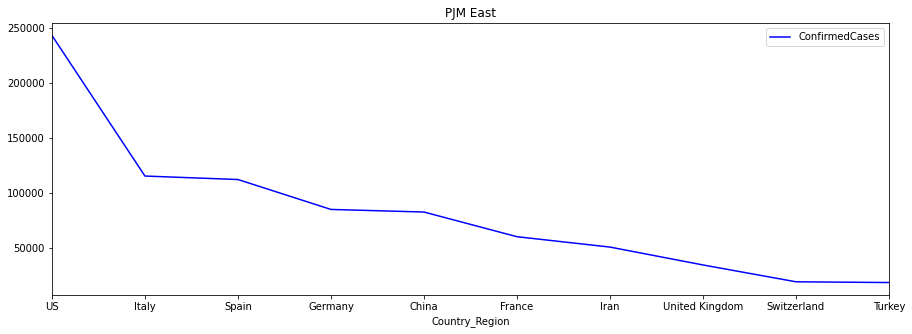

In [0]:
top10.plot(figsize=(15,5), color='blue', title='PJM East')
plt.show()

In [0]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [0]:

def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X


In [0]:
train_features=pd.DataFrame(create_features(train))
train_features

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2020-01-22,0,2,1,1,2020,22,22,4
2020-01-23,0,3,1,1,2020,23,23,4
2020-01-24,0,4,1,1,2020,24,24,4
2020-01-25,0,5,1,1,2020,25,25,4
2020-01-26,0,6,1,1,2020,26,26,4
...,...,...,...,...,...,...,...,...
2020-03-29,0,6,1,3,2020,89,29,13
2020-03-30,0,0,1,3,2020,90,30,14
2020-03-31,0,1,1,3,2020,91,31,14


In [0]:
test_features=pd.DataFrame(create_features(test))
test_features

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2020-03-26,0,3,1,3,2020,86,26,13
2020-03-27,0,4,1,3,2020,87,27,13
2020-03-28,0,5,1,3,2020,88,28,13
2020-03-29,0,6,1,3,2020,89,29,13
2020-03-30,0,0,1,3,2020,90,30,14
...,...,...,...,...,...,...,...,...
2020-05-03,0,6,2,5,2020,124,3,18
2020-05-04,0,0,2,5,2020,125,4,19
2020-05-05,0,1,2,5,2020,126,5,19


In [0]:
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_train.sample(6)

,Id,Province_State,Country_Region,ConfirmedCases,Fatalities,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2020-03-23,62,NaN,Afghanistan,40.0,1.0,0,0,1,3,2020,83,23,13
2020-02-07,16602,NaN,Laos,0.0,0.0,0,4,1,2,2020,38,7,6
2020-02-02,10712,NaN,Djibouti,0.0,0.0,0,6,1,2,2020,33,2,5
2020-02-26,2390,NaN,Belarus,0.0,0.0,0,2,1,2,2020,57,26,9
2020-01-25,22795,NaN,Slovakia,0.0,0.0,0,5,1,1,2020,25,25,4
2020-02-27,9560,NaN,Congo (Kinshasa),0.0,0.0,0,3,1,2,2020,58,27,9


In [0]:
features_and_target_test = pd.concat([test,test_features], axis=1)
features_and_target_test.sample(6)

,ForecastId,Province_State,Country_Region,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,
2020-04-07,9516,NaN,Sweden,0,1,2,4,2020,98,7,15
2020-03-29,8088,NaN,North Macedonia,0,6,1,3,2020,89,29,13
2020-04-22,5145,Reunion,France,0,2,2,4,2020,113,22,17
2020-04-18,3550,Tianjin,China,0,5,2,4,2020,109,18,16
2020-04-01,9037,NaN,Seychelles,0,2,2,4,2020,92,1,14
2020-04-21,12196,West Virginia,US,0,1,2,4,2020,112,21,17


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [0]:
features_and_target_train= FunLabelEncoder(features_and_target_train)
features_and_target_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22032 entries, 2020-01-22 to 2020-04-02
Data columns (total 13 columns):
Id                22032 non-null int64
Province_State    22032 non-null int64
Country_Region    22032 non-null int64
ConfirmedCases    22032 non-null float64
Fatalities        22032 non-null float64
hour              22032 non-null int64
dayofweek         22032 non-null int64
quarter           22032 non-null int64
month             22032 non-null int64
year              22032 non-null int64
dayofyear         22032 non-null int64
dayofmonth        22032 non-null int64
weekofyear        22032 non-null int64
dtypes: float64(2), int64(11)
memory usage: 2.4 MB


In [0]:
features_and_target_test= FunLabelEncoder(features_and_target_test)
features_and_target_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13158 entries, 2020-03-26 to 2020-05-07
Data columns (total 11 columns):
ForecastId        13158 non-null int64
Province_State    13158 non-null int64
Country_Region    13158 non-null int64
hour              13158 non-null int64
dayofweek         13158 non-null int64
quarter           13158 non-null int64
month             13158 non-null int64
year              13158 non-null int64
dayofyear         13158 non-null int64
dayofmonth        13158 non-null int64
weekofyear        13158 non-null int64
dtypes: int64(11)
memory usage: 1.2 MB


In [0]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]

In [0]:
from fbprophet import Prophet
model=Prophet()
model.fit(features_and_target_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'ConfirmedCases':'y'}))

In [0]:
Covid_test_forecast=model.predict(df=features_and_target_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

In [0]:
Covid_test_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
13153,2020-05-07,8941.348079,2783.854969,15484.204107,8172.145328,9761.102143,18.758001,18.758001,18.758001,18.758001,18.758001,18.758001,0.0,0.0,0.0,8960.106081
13154,2020-05-07,8941.348079,2526.733571,14566.068837,8172.145328,9761.102143,18.758001,18.758001,18.758001,18.758001,18.758001,18.758001,0.0,0.0,0.0,8960.106081
13155,2020-05-07,8941.348079,2583.406758,15304.194533,8172.145328,9761.102143,18.758001,18.758001,18.758001,18.758001,18.758001,18.758001,0.0,0.0,0.0,8960.106081
13156,2020-05-07,8941.348079,3015.152605,15194.370350,8172.145328,9761.102143,18.758001,18.758001,18.758001,18.758001,18.758001,18.758001,0.0,0.0,0.0,8960.106081
13157,2020-05-07,8941.348079,2276.128650,15248.888650,8172.145328,9761.102143,18.758001,18.758001,18.758001,18.758001,18.758001,18.758001,0.0,0.0,0.0,8960.106081


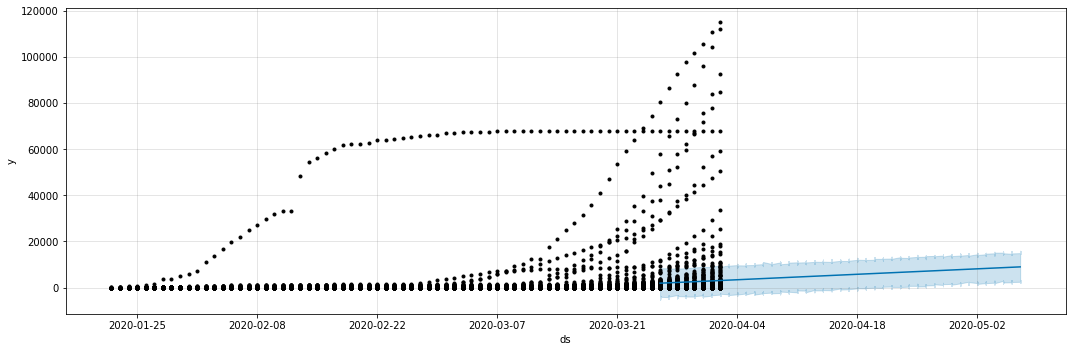

In [0]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(Covid_test_forecast,
                 ax=ax)
plt.show()

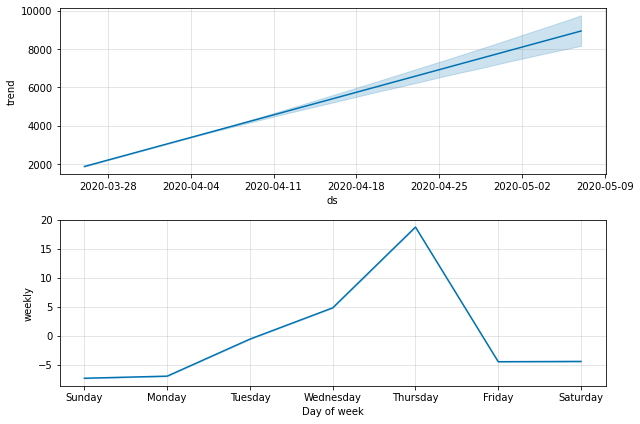

In [0]:
# Plot the components of the model
fig = model.plot_components(Covid_test_forecast)

In [0]:
model_1=Prophet()
model_1.fit(features_and_target_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'Fatalities':'y'}))

In [0]:
Covid_test_forecast_Fatilities=model.predict(df=features_and_target_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

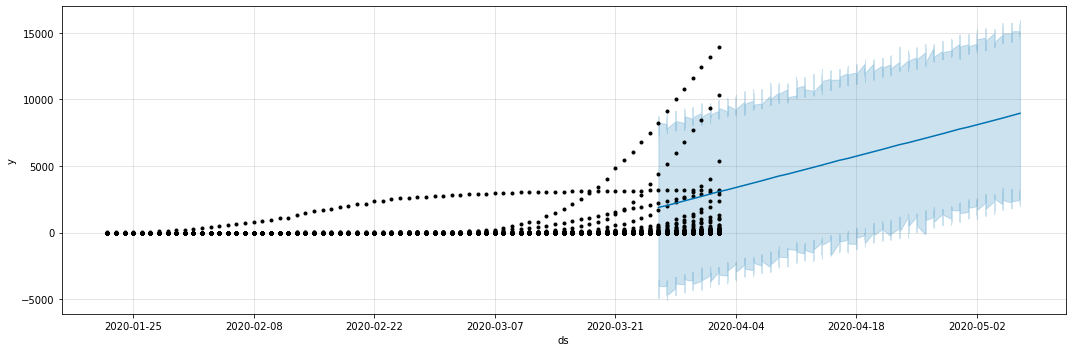

In [0]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_1.plot(Covid_test_forecast_Fatilities,
                 ax=ax)
plt.show()

The shaded part is the forecasted result

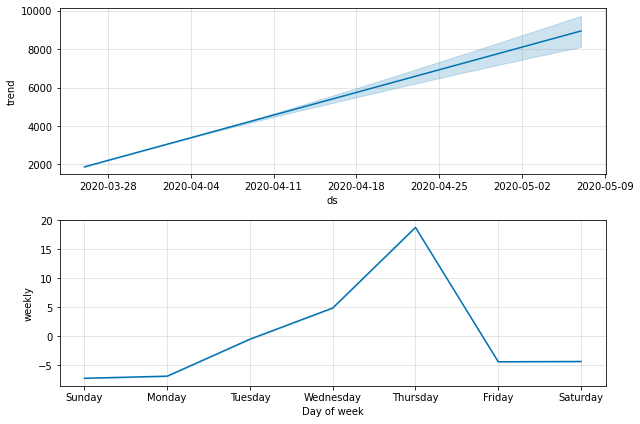

In [0]:
fig = model.plot_components(Covid_test_forecast_Fatilities)